<h1>Kaggle Competition</h1>

<b>Important Note</b>: Try to make sure in each cell, if you are modifying/altering the variables, a <u>copy</u> of the previous cell's variables should be used instead. This is so that when something needs to be done again midway, you don't have to run the whole notebook from the beginning.

<h3>All Imports</h3>

In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

<h2>Input</h2>

In [2]:
#movies.txtz
movies = pd.read_csv("./movies.txt", sep="::", names=["MovieID", "Title", "Genre"], engine = "python")
print(movies.shape)
movies.head()

(3883, 3)


,MovieID,Title,Genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
#Code reserve, for preprocessing.
dict_age = {"1": "Under 18",
            "18": "18-24",
            "25": "25-34",
            "35": "35-44",
            "45": "45-49",
            "50": "50-55",
            "56": "56+"
           }
dict_gender = {"M": "Male",
               "F": "Female"
              }
dict_occupation = {
    "0": "other or not specified",
    "1": "academic/educator",
    "2": "artist",
    "3": "clerical/admin",
    "4": "college/grad student",
    "5": "customer service",
    "6": "doctor/health care",
    "7": "executive/managerial",
    "8": "farmer",
    "9": "homemaker",
    "10": "K-12 student",
    "11": "lawyer",
    "12": "programmer",
    "13": "retired",
    "14": "sales/marketing",
    "15": "scientist",
    "16": "self-employed",
    "17": "technician/engineer",
    "18": "tradesman/craftsman",
    "19": "unemployed",
    "20": "writer"
}

In [4]:
#users.txt
users = pd.read_csv("./users.txt", sep="::", names=["UserID", "Gender", "Age", "Occupation", "Zip-code"], engine = "python")
print(users.shape)
users.head()

(6040, 5)


,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [5]:
#training data
train = pd.read_csv("./training.txt", names=["UserID", "MovieID", "Rating", "Timestamp"]) #sep = ','
print(train.shape)
train.head()

(700146, 4)


,UserID,MovieID,Rating,Timestamp
0,63,3006,4,977899676
1,1125,10,2,975625890
2,181,2384,2,977088920
3,1968,1610,4,974742431
4,4156,2410,4,965342309


In [6]:
#testing data
test = pd.read_csv("./testing.txt", names=["UserID", "MovieID", "Timestamp"]) #sep = ','
print(test.shape)
test.head()

(300063, 3)


,UserID,MovieID,Timestamp
0,324,2803,976406738
1,4447,1920,965146127
2,4238,3676,965417632
3,4661,368,963867813
4,5078,3471,962416423


<h2>Data Exploration and Manipulation</h2>

In this section, we explore the kinds of data, make meaningful (or meaningless) analysis, and do a bit of changing with the data. Preprocessing is for later, where we modify the structure of data and/or alter the rows in data to make it suitable for feeding to our prediction algorithms. Will use dummytrain variables as to not change the original dataframe, unless necessary.

<h3>Seperating Title from Year</h3>

In [7]:
movies_title = movies.copy()
for i, s in enumerate(movies_title['Title']):
    year = re.search("\((\d{4})\)", s).group()
    s = s.replace(" " + year, "")
    movies_title.loc[i,('Title')] = movies_title.loc[i,('Title')].replace(" " + year, "")
    movies_title.loc[i,('Year')] = year[1:-1]
movies_title

,MovieID,Title,Genre,Year
0,1,Toy Story,Animation|Children's|Comedy,1995
1,2,Jumanji,Adventure|Children's|Fantasy,1995
2,3,Grumpier Old Men,Comedy|Romance,1995
3,4,Waiting to Exhale,Comedy|Drama,1995
4,5,Father of the Bride Part II,Comedy,1995
...,...,...,...,...
3878,3948,Meet the Parents,Comedy,2000
3879,3949,Requiem for a Dream,Drama,2000
3880,3950,Tigerland,Drama,2000
3881,3951,Two Family House,Drama,2000


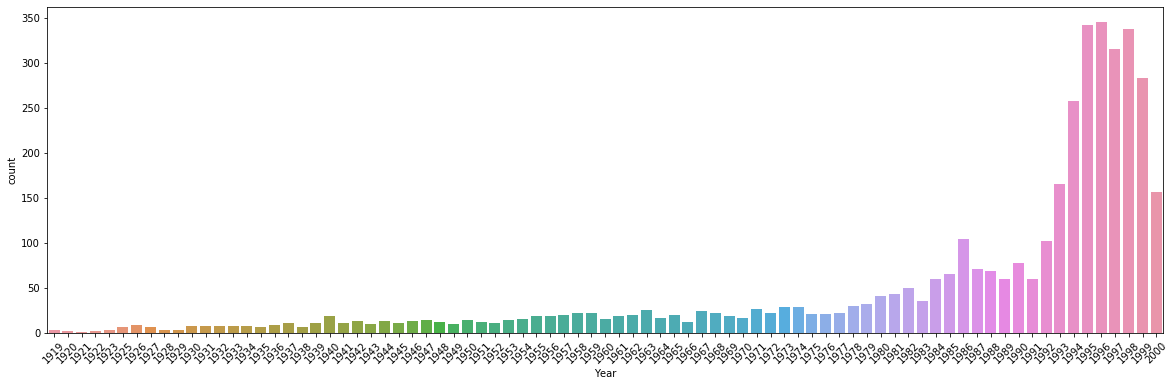

In [8]:
plt.figure(figsize=(20,6))
ax = sns.countplot(x="Year", data=movies_title)
ax.set_xticklabels(
    ax.get_xticklabels(), 
    rotation=45, 
    fontweight='light',
)
plt.show()

<h3>Seperating Genres, then one-hot encoding</h3>

In [9]:
movievariable = movies_title.copy()
movievariable['Genre'] = movievariable['Genre'].str.split('|')
movies_genre = pd.concat([movievariable,pd.get_dummies(movievariable['Genre'].apply(pd.Series).stack()).sum(level=0)],axis=1)
movies_genre.drop('Genre',axis=1,inplace=True)
movies_genre.head()

,MovieID,Title,Year,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,1995,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji,1995,0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men,1995,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale,1995,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Father of the Bride Part II,1995,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


<BarContainer object of 18 artists>

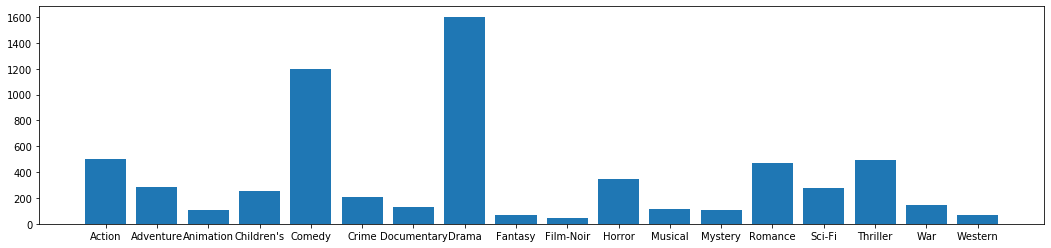

In [10]:
genre_frequency = {"Action": movies_genre["Action"].sum(),
                   "Adventure": movies_genre["Adventure"].sum(),
                   "Animation": movies_genre["Animation"].sum(),
                   "Children's": movies_genre["Children's"].sum(),
                   "Comedy": movies_genre["Comedy"].sum(),
                   "Crime": movies_genre["Crime"].sum(),
                   "Documentary": movies_genre["Documentary"].sum(),
                   "Drama": movies_genre["Drama"].sum(),
                   "Fantasy": movies_genre["Fantasy"].sum(),
                   "Film-Noir": movies_genre["Film-Noir"].sum(),
                   "Horror": movies_genre["Horror"].sum(),
                   "Musical": movies_genre["Musical"].sum(),
                   "Mystery": movies_genre["Mystery"].sum(),
                   "Romance": movies_genre["Romance"].sum(),
                   "Sci-Fi": movies_genre["Sci-Fi"].sum(),
                   "Thriller": movies_genre["Thriller"].sum(),
                   "War": movies_genre["War"].sum(),
                   "Western": movies_genre["Western"].sum()
                  }
plt.figure(figsize=(18,4))
plt.bar(genre_frequency.keys(), genre_frequency.values())

<h3>List of movies unrated/unwatched</h3>

In [11]:
result_set = set(map(int, movies['MovieID'].unique().tolist()))
movies_set = set(range(1, 3883))
missing_movies = sorted(movies_set - result_set)
missing_movies

[91,
 221,
 323,
 622,
 646,
 677,
 686,
 689,
 740,
 817,
 883,
 995,
 1048,
 1072,
 1074,
 1182,
 1195,
 1229,
 1239,
 1338,
 1402,
 1403,
 1418,
 1435,
 1451,
 1452,
 1469,
 1478,
 1481,
 1491,
 1492,
 1505,
 1506,
 1512,
 1521,
 1530,
 1536,
 1540,
 1560,
 1576,
 1607,
 1618,
 1634,
 1637,
 1638,
 1691,
 1700,
 1712,
 1736,
 1737,
 1745,
 1751,
 1761,
 1763,
 1766,
 1775,
 1778,
 1786,
 1790,
 1800,
 1802,
 1803,
 1808,
 1813,
 1818,
 1823,
 1828,
 1838,
 3815]

<h3>Filling Zipcodes</h3>

In [12]:
#Prepare zipcodes from https://simplemaps.com/data/us-zips(first) and https://github.com/millbj92/US-Zip-Codes-JSON(second)
zipcodes = pd.read_csv("uszips.csv")
zipcodes[["zip"]] = zipcodes[["zip"]].applymap(str)
zipcodes[["city_name"]] = zipcodes[["city"]]
zipcodes['zip']= zipcodes['zip'].str.lstrip('0')
zipcodes.drop('city',axis=1,inplace=True)
zipcodes2 = pd.read_json('USCities.json')
zipcodes2[["zip_code"]] = zipcodes2[["zip_code"]].applymap(str)

In [13]:
states = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}

typo_county = {
    "Du Page" : "DuPage",
    "Saint Marys" : "St. Mary's",
    "Saint Lucie" : "St. Lucie",
    "Saint Tammany" : "St. Tammany",
    "Saint Louis" : "St. Louis",
    "District Of Columbia" : "District of Columbia",
    "Saint Croix": "St. Croix",
    "De Kalb" : "DeKalb",
    "Dekalb" : "DeKalb",
    "De Soto" : "DeSoto",
    "Saint Clair" : "St. Clair",
    "La Salle" : "LaSalle",
    "Saint Bernard" : "St. Bernard",
    "St Joseph": "St. Joseph",
    "Bayamon" : "Bayamón",
    "Lewis And Clark" : "Lewis and Clark",
    "Dona Ana" : "Doña Ana",
    "Saint Joseph" : "St. Joseph",
    "Saint Johns" : "St. Johns",
    "Saint Charles" : "St. Charles",
    "Saint Louis City" : "St. Louis",
    "St Joseph" : "St. Joseph",
    "Saint Lawrence" : "St. Lawrence",
    "La Porte" : "LaPorte",
    "Fond Du Lac" : "Fond du Lac",
    "Mchenry" : "McHenry",
    "Mclean" : "McLean",
    "Mcpherson" : "McPherson",   
    "Prince Georges" : "Prince George's",
}

typo_city = {
    "Mc Kinney" : "McKinney",
    "Mckinney" : "McKinney",
    "Bayamon" : "Bayamón",
    "W Harford": "West Harford"
}

county_remove_city = {
    "Charlottesville City" : "Charlottesville",
    "Lynchburg City" : "Lynchburg",
    "Baltimore City" : "Baltimore",
    "Alexandria City" : "Alexandria",
    "Richmond City" : "Richmond",
    "Bedford City" : "Bedford",
    "Newport News City" : "Newport News",
    "Fairfax City" : "Fairfax",
    "Winchester City" : "Winchester",
    "Virginia Beach City" : "Virginia Beach",
    "Harrisonburg City" : "Harrisonburg",
    "Falls Church City" : "Falls Church",
    "Norfolk City" : "Norfolk",
    "Danville City" : "Danville",
    "Lexington City" : "Lexington",
    "Suffolk City" : "Suffolk",
    "Fredericksburg City" : "Fredericksburg",
    "Roanoke City" : "Roanoke",
    "Manassas City" : "Manassas"
}
zipcodes2['state'] = zipcodes2['state'].map(states).fillna(zipcodes2['state']) #zipcodes2's state is abbreviated
# Naming convention
zipcodes2['county'] = zipcodes2['county'].map(typo_county).fillna(zipcodes2['county'])
zipcodes2['county'] = zipcodes2['county'].map(county_remove_city).fillna(zipcodes2['county'])
zipcodes2['city'] = zipcodes2['city'].map(typo_city).fillna(zipcodes2['city'])
zipcodes['city_name'] = zipcodes['city_name'].map(typo_city).fillna(zipcodes['city_name'])

In [47]:
usersvariable = users.copy()
usersvariable['Zip-code']= usersvariable['Zip-code'].str.lstrip('0')
users_zipcode1 = pd.merge(usersvariable, zipcodes[['zip', 'city_name', 'state_name', 'county_name']], how='left',left_on=['Zip-code'],right_on=['zip'])
users_zipcode2 = pd.merge(users_zipcode1, zipcodes2[['zip_code', 'city', 'state', 'county']], how='left',left_on=['Zip-code'],right_on=['zip_code'])
users_zipcode2

,UserID,Gender,Age,Occupation,Zip-code,zip,city_name,state_name,county_name,zip_code,city,state,county
0,1,F,1,10,48067,48067,Royal Oak,Michigan,Oakland,48067,Royal Oak,Michigan,Oakland
1,2,M,56,16,70072,70072,Marrero,Louisiana,Jefferson,70072,Marrero,Louisiana,Jefferson
2,3,M,25,15,55117,55117,Saint Paul,Minnesota,Ramsey,55117,Saint Paul,Minnesota,Ramsey
3,4,M,45,7,2460,2460,Newtonville,Massachusetts,Middlesex,2460,Newtonville,Massachusetts,Middlesex
4,5,M,25,20,55455,55455,Minneapolis,Minnesota,Hennepin,55455,Minneapolis,Minnesota,Hennepin
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6035,6036,F,25,15,32603,32603,Gainesville,Florida,Alachua,32603,Gainesville,Florida,Alachua
6036,6037,F,45,1,76006,76006,Arlington,Texas,Tarrant,76006,Arlington,Texas,Tarrant
6037,6038,F,56,1,14706,14706,Allegany,New York,Cattaraugus,14706,Allegany,New York,Cattaraugus
6038,6039,F,45,0,1060,1060,Northampton,Massachusetts,Hampshire,1060,Northampton,Massachusetts,Hampshire


<h3>Checking Possibilities of Errors in Filling Zipcodes</h3>

In [49]:
users_zipcode2['same'] = np.where((users_zipcode2['city_name'] == users_zipcode2['city']) & (users_zipcode2['state_name'] == users_zipcode2['state']) & (users_zipcode2['county_name'] == users_zipcode2['county']), True, False)

In [50]:
#pd.set_option('display.max_rows', 204)

#Inconsistency of places in zipcode
zip0 = users_zipcode2.loc[(users_zipcode2['same']==False) & (users_zipcode2['zip'].notnull()) & (users_zipcode2['zip_code'].notnull()) & ((users_zipcode2['city_name'] != users_zipcode2['city']) | (users_zipcode2['state_name'] != users_zipcode2['state']) | (users_zipcode2['county_name'] != users_zipcode2['county']))]
zip0.to_csv('inconsistent.csv')
zip0
# Saint Paul di Ramsey, bukan di Washington(Wikipedia & https://www.unitedstateszipcodes.org/55110/)
# Atlanta di Fulton, bukan DeKalb(Wikipedia & https://www.unitedstateszipcodes.org/30350/)
# 66212 di Overland, bukan Shawnee(meskipun bisa di-accept juga)(https://www.mapdevelopers.com/what-is-my-zip-code.php & https://www.unitedstateszipcodes.org/66212/)
# Frisco di Collin dan Denton(harus 2-2nya, bukan salah satu saja) (Wikipedia)
#        di Denton(https://www.unitedstateszipcodes.org/75034/)
# 66205 di Roeland Park, bukan di Mission dan Shawnee(https://www.mapdevelopers.com/what-is-my-zip-code.php)
#       di Mission(https://www.unitedstateszipcodes.org/66205/)
# 96860 tidak ada nama city-nya(https://www.mapdevelopers.com/what-is-my-zip-code.php)
#       di Jbphh, bukan Pearl Harbor(meskipun singkatannya Joint Base Pearl Harbor-Hickam) (https://www.unitedstateszipcodes.org/96860/)
# 53092 di Thiensville, bukan Mequon(meskipun bisa di-accept juga)(https://www.unitedstateszipcodes.org/53092/)
# 66211 di Overland, bukan Leawood dan Shawnee(https://www.mapdevelopers.com/what-is-my-zip-code.php)
#       di Leawood(https://www.unitedstateszipcodes.org/66211/)
# McKinney, bukan Mckinney atau Mc Kinney (Wikipedia)
# 75287 di Dallas, bukan Denton(Wikipedia)
#       di Denton(https://www.unitedstateszipcodes.org/75287/)
# 80020 di Broomfield, bukan Boulder(Wikipedia & https://www.unitedstateszipcodes.org/80020/)
# 2125 di Dorchester, bukan Boston(meskipun bisa di-accept juga)(https://www.unitedstateszipcodes.org/02125/)
# 60103 bisa di Cook, DuPage atau Kane(https://www.village.bartlett.il.us/our-community/counties)
#      di DuPage(https://www.unitedstateszipcodes.org/60103/)
# 2127 di South Boston, bukan di Boston(Wikipedia)
#      di Boston(di Mapnya ada Southnya(https://www.unitedstateszipcodes.org/02127/)
# 77345 di Kingwood, bukan Humble(https://www.unitedstateszipcodes.org/77345/)
# 48178 di Oakland, bukan Washtenaw(https://www.unitedstateszipcodes.org/77345/)
# 66224 di Overland Park, bukan Shawnee(meskipun bisa di-accept juga)(https://www.mapdevelopers.com/what-is-my-zip-code.php & https://www.unitedstateszipcodes.org/66224/)
# 66204 di Overland Park, bukan Shawnee(meskipun bisa di-accept juga)(https://www.mapdevelopers.com/what-is-my-zip-code.php & https://www.unitedstateszipcodes.org/66204/)
# 54915 di Outagamie, bukan Winnebago(https://www.mapdevelopers.com/what-is-my-zip-code.php & https://www.unitedstateszipcodes.org/54915/)
# 66208 di Prairie Village, bukan Shawnee(meskipun bisa di-accept juga)(https://www.mapdevelopers.com/what-is-my-zip-code.php & https://www.unitedstateszipcodes.org/66208/)
# 23059 di Henrico, bukan Hanover(https://www.mapdevelopers.com/what-is-my-zip-code.php & https://www.unitedstateszipcodes.org/23059/)
# 60042 di McHenry, bukan Lake(https://www.mapdevelopers.com/what-is-my-zip-code.php & https://www.unitedstateszipcodes.org/60042/)
# 66203 di Shawnee, bukan Shawnee Mission(meskipun bisa di-accept juga)(https://www.mapdevelopers.com/what-is-my-zip-code.php & https://www.unitedstateszipcodes.org/66203/)
# 80227 di Denver, bukan Jefferson(https://www.mapdevelopers.com/what-is-my-zip-code.php)
#       di Jefferson (https://www.unitedstateszipcodes.org/80227/)
# 23229 di Henrico, bukan Richmond(https://www.unitedstateszipcodes.org/23229/)
# 23233 di Henrico, bukan Richmond(https://www.unitedstateszipcodes.org/23233/)
# 24450 di Rockbridge, bukan Lexington City(https://www.unitedstateszipcodes.org/24450/)
# 19003 di Montgomery, bukan Delaware(https://www.unitedstateszipcodes.org/19003/)
# 92509 di Riverside, bukan Jurupa Valley(https://www.unitedstateszipcodes.org/92509/)
# 30662 di Franklin, bukan Madison(https://www.mapdevelopers.com/what-is-my-zip-code.php & https://www.unitedstateszipcodes.org/30662/)
# 30052 di Walton, bukan Gwinnett(https://www.unitedstateszipcodes.org/30052/)
# 80227 di Osseo, bukan Maple Grove(meskipun bisa di-accept juga)(https://www.unitedstateszipcodes.org/80227/)
# 84119 di Salt Lake City, bukan West Valley City(meskipun bisa di-accept juga)(https://www.unitedstateszipcodes.org/84119/)
# 33028 di Pembroke Pines, bukan Hollywood(https://www.unitedstateszipcodes.org/33028/)

# 55110 di Ramsey, bukan Washington
# 55311 di Osseo, bukan Maple Grove
# 91326 di Porter Ranch, bukan Northridge
# 78666 di Hays, bukan Guadalupe
# 99826 di Hoonah-Angoon, bukan Skagway Hoonah Angoon(meskipun bisa di-accept juga)
# 30102 di Cherokee, bukan Cobb
# 48484 di Lapeer, bukan Genesee
# 30097 di Duluth, bukan Forsyth
# 78737 di Hays, bukan Travis
# 38028 di Fayette, bukan Shelby
# 71711 di Calhoun, bukan Ouachita
# 75034 di Denton, bukan Collin
# 66209 di Leawood, bukan Shawnee Mission
# 63041 di Franklin, bukan Jefferson
# 22923 di Greene, bukan Orange

# McHenry, bukan Mchenry atau Mc Henry
# McLean, bukan Mclean
# DeSoto, bukan De Soto
# DeKalb, bukan Dekalb
# McPherson, bukan Mcpherson
# Prince George's, bukan Prince Georges

# akhiran "City" pada beberapa county dihapus agar konsisten dengan county_name
# contoh: Charlottesville, Fairfax, Virginia Beach, Newport News, Harrisonburg, Suffolk, Norfolk, Bedford

,UserID,Gender,Age,Occupation,Zip-code,zip,city_name,state_name,county_name,zip_code,city,state,county,same
36,37,F,25,9,66212,66212,Overland Park,Kansas,Johnson,66212,Shawnee Mission,Kansas,Johnson,False
56,57,M,18,19,30350,30350,Atlanta,Georgia,Fulton,30350,Atlanta,Georgia,DeKalb,False
96,97,F,35,3,66210,66210,Overland Park,Kansas,Johnson,66210,Shawnee Mission,Kansas,Johnson,False
107,108,M,25,12,30316,30316,Atlanta,Georgia,DeKalb,30316,Atlanta,Georgia,Fulton,False
133,134,M,25,0,66212,66212,Overland Park,Kansas,Johnson,66212,Shawnee Mission,Kansas,Johnson,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5689,5690,M,18,4,78666,78666,San Marcos,Texas,Guadalupe,78666,San Marcos,Texas,Hays,False
5700,5701,M,25,7,55311,55311,Maple Grove,Minnesota,Hennepin,55311,Osseo,Minnesota,Hennepin,False
5766,5767,M,25,2,75287,75287,Dallas,Texas,Denton,75287,Dallas,Texas,Dallas,False
5816,5817,M,25,17,33028,33028,Pembroke Pines,Florida,Broward,33028,Hollywood,Florida,Broward,False


In [51]:
# Solving zipcodes that aren't in https://simplemaps.com/data/us-zips and https://github.com/millbj92/US-Zip-Codes-JSON
zip1 = users_zipcode2.loc[(users_zipcode2['same']==False) & (users_zipcode2['zip'].isnull()) & (users_zipcode2['zip_code'].isnull())]
zip1.to_csv('none.csv')
zip1
# Sumber utama dari https://www.unitedstateszipcodes.org/, diperkuat dengan https://www.mapdevelopers.com/what-is-my-zip-code.php.
# Kalau sumber keduanya agak ngaco, percaya sumber utama saja. Kalau 2-2nya nggak jelas, boleh coba cari di Google. Kalau nggak ada, tulis nggak ada.
# Bagian ini kalau ada yang memang ada, taruh di paling atas/paling bawah biar jelas.
# 64043 tidak ada
# 98107-2117 tidak ada. 98107 itu Seattle, Washington, King.  2117 itu Boston, Massachusetts, Suffolk
# 37919-4204 tidak ada. 37919 itu Knoxville, Tennessee, Knox. 4204 itu tidak ada
# 98153 tidak ada.

# 55337(Burnsville, Minnesota, Dakota)-4056
# 55405(Minneapolis, Minnesota, Hennepin)-2546
# 55103(Saint Paul, Minnesota, Ramsey)-1006
# 52570(Milton, Iowa, Van Buren)-9634
# 53404-1230
# 68144-2410
# 93240-2852
# 2020010
# 92612-3417
# 72227-5733
# 92683-1892
# 98043-3621
# 11710-1641
# 33067-1400
# 02136-1522
# 37923-3112
# 27713-9225
# 88005-4313
# 95451-9554
# 48103-4711
# 64081-8102
# 80004-4448
# 50265-2580
# 08854-3115
# 27514-3540
# 15701-3148
# 91790-1161
# 400060
# 62263-3004
# 01094-1355
# 70809-2612
# 92711-0571
# 94930-2010
# 49503-1313
# 48316-5601
# 11510-2001
# 62330-1408
# 11414-2520
# 111225
# 15701-2017
# 45322-3132
# 0956456
# 90014-1718
# 96707-1321
# 19087-3622
# 63123-1507
# 84109-2001
# 193122042
# 77565-2332
# 62025-8000
# 02725-1010
# 11230-1710
# 20003-2712
# 20120-6354
# 85287-2702
# 191004
# 12833-2000
# 10461-1301
# 23455-4959
# 90035-4444
# 73069-5429
# 78705-5221

# 0 di depan dihapus

# dst (Tolong dipastikan apakah ada atau tidak)

,UserID,Gender,Age,Occupation,Zip-code,zip,city_name,state_name,county_name,zip_code,city,state,county,same
142,143,M,18,3,64043,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
160,161,M,45,16,98107-2117,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
232,233,F,45,20,37919-4204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
234,235,M,25,0,98153,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
292,293,M,56,1,55337-4056,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5859,5860,F,25,4,91428,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
5903,5904,F,45,12,954025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
5924,5925,F,25,0,90035-4444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
5966,5967,M,50,16,73069-5429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


In [53]:
# Solving zipcodes that are in https://github.com/millbj92/US-Zip-Codes-JSON but not in https://simplemaps.com/data/us-zips

zip2 = users_zipcode2.loc[(users_zipcode2['same']==False) & (users_zipcode2['zip'].isnull()) & (users_zipcode2['zip_code'].notnull())]
zip2.to_csv('in_json.csv')
zip2
# Sumber utama dari https://www.unitedstateszipcodes.org/, diperkuat dengan https://www.mapdevelopers.com/what-is-my-zip-code.php.
# Kalau sumber keduanya agak ngaco, percaya sumber utama saja. Kalau 2-2nya nggak jelas, boleh coba cari di Google. Kalau nggak ada, tulis nggak ada.
# 32793 di Winter Park, Florida, Orange
# 96931 di Tamuning, Guam, Guam
# 6520 di New Haven, Connecticut, New Haven
# 21203 di Baltimore, Maryland, Baltimore City

,UserID,Gender,Age,Occupation,Zip-code,zip,city_name,state_name,county_name,zip_code,city,state,county,same
11,12,M,25,12,32793,NaN,NaN,NaN,NaN,32793,Winter Park,Florida,Orange,False
52,53,M,25,0,96931,NaN,NaN,NaN,NaN,96931,Tamuning,Guam,Guam,False
130,131,M,18,4,6520,NaN,NaN,NaN,NaN,6520,New Haven,Connecticut,New Haven,False
173,174,M,25,16,21203,NaN,NaN,NaN,NaN,21203,Baltimore,Maryland,Baltimore,False
295,296,M,50,5,89432,NaN,NaN,NaN,NaN,89432,Sparks,Nevada,Washoe,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5715,5716,M,1,10,3756,NaN,NaN,NaN,NaN,3756,Lebanon,New Hampshire,Grafton,False
5727,5728,F,35,20,9824,NaN,NaN,NaN,NaN,9824,Apo,AE,,False
5781,5782,F,35,0,55459,NaN,NaN,NaN,NaN,55459,Minneapolis,Minnesota,Hennepin,False
5884,5885,M,25,1,96930,NaN,NaN,NaN,NaN,96930,Talofofo,Guam,Guam,False


In [52]:
# Solving zipcodes that are in https://simplemaps.com/data/us-zips but not in https://github.com/millbj92/US-Zip-Codes-JSON

users_zipcode2.loc[(users_zipcode2['same']==False) & (users_zipcode2['zip'].notnull()) & (users_zipcode2['zip_code'].isnull())]
# 80023 di Broomfield, Colorado, Broomfield

,UserID,Gender,Age,Occupation,Zip-code,zip,city_name,state_name,county_name,zip_code,city,state,county,same
1888,1889,M,18,14,80023,80023,Broomfield,Colorado,Broomfield,NaN,NaN,NaN,NaN,False


<h3>Change Timestamp to Meaningful Format</h3>

In [20]:
dummytrain1 = train.copy()
dummytrain1['Timestamp'] = pd.to_datetime(train['Timestamp'], unit='s')
dummytrain1.head()

,UserID,MovieID,Rating,Timestamp
0,63,3006,4,2000-12-27 06:47:56
1,1125,10,2,2000-11-30 23:11:30
2,181,2384,2,2000-12-17 21:35:20
3,1968,1610,4,2000-11-20 17:47:11
4,4156,2410,4,2000-08-03 22:38:29


In [21]:
dummytrain1["Timestamp"].describe()

count                  700146
unique                 382494
top       2000-11-29 20:01:55
freq                       23
first     2000-04-25 23:05:32
last      2003-02-28 17:49:08
Name: Timestamp, dtype: object

In [22]:
dummytrain2 = dummytrain1.copy()
dummytrain2['year'] = pd.DatetimeIndex(dummytrain2['Timestamp']).year
dummytrain2['month'] = pd.DatetimeIndex(dummytrain2['Timestamp']).month
dummytrain2['day'] = pd.DatetimeIndex(dummytrain2['Timestamp']).day
dummytrain2['hour'] = pd.DatetimeIndex(dummytrain2['Timestamp']).hour
dummytrain2 = dummytrain2.drop(columns = ['Timestamp'])
dummytrain2.head()

,UserID,MovieID,Rating,year,month,day,hour
0,63,3006,4,2000,12,27,6
1,1125,10,2,2000,11,30,23
2,181,2384,2,2000,12,17,21
3,1968,1610,4,2000,11,20,17
4,4156,2410,4,2000,8,3,22


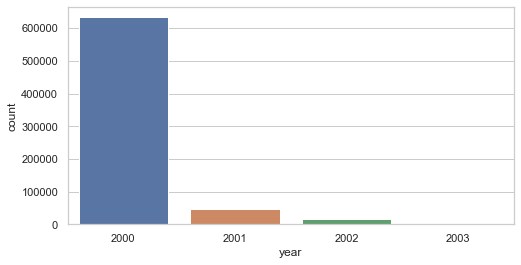

In [23]:
sns.set(style="whitegrid")
plt.figure(figsize=(8,4))
ax = sns.countplot(x="year", data=dummytrain2)
plt.show()

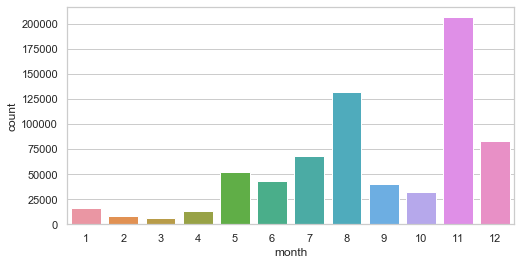

In [24]:
plt.figure(figsize=(8,4))
ax = sns.countplot(x="month", data=dummytrain2)
plt.show()

# Academic: (School) 1-2 weeks winter at Christmas and New Year, spring in March or April 
#                    that is usually correlated to the holidays of Easter and usually Passover.
#           (University - Semester) Fall in September to mid-December, 
#                                   Spring/winter semester from late January to early May, 
#                                   and an optional summer session 
#                                   -> May to September & December to January are holidays
#           (University - Quarter) Fall from September to mid-December, 
#                                  Winter from early January to mid-March,
#                                  Spring from late March or early April to mid-June, 
#                                  and an optional summer session
#                                  -> June to August and December to January are holidays
#           (University - 4-1-4) September to December and February to May + January
#                                -> June to August are holidays
#           (University - 4-4-1) - Unknown
#           (University - Trimester) Fall and winter : 30–32 weeks + 7.5 week Spring + 6-7.5 week Summer(Spring-Summer)

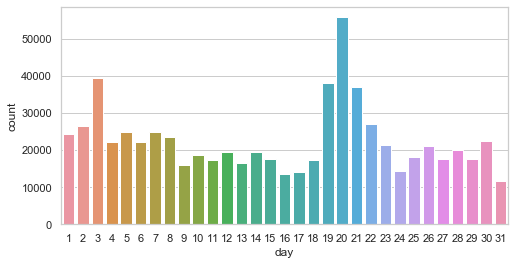

In [25]:
plt.figure(figsize=(8,4))
ax = sns.countplot(x="day", data=dummytrain2)
plt.show()

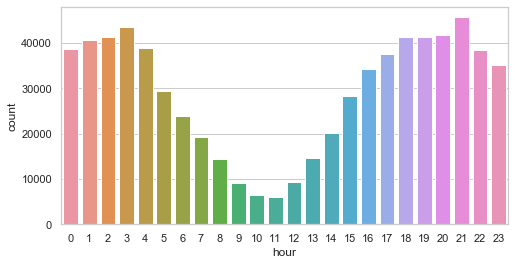

In [26]:
plt.figure(figsize=(8,4))
ax = sns.countplot(x="hour", data=dummytrain2)
plt.show()

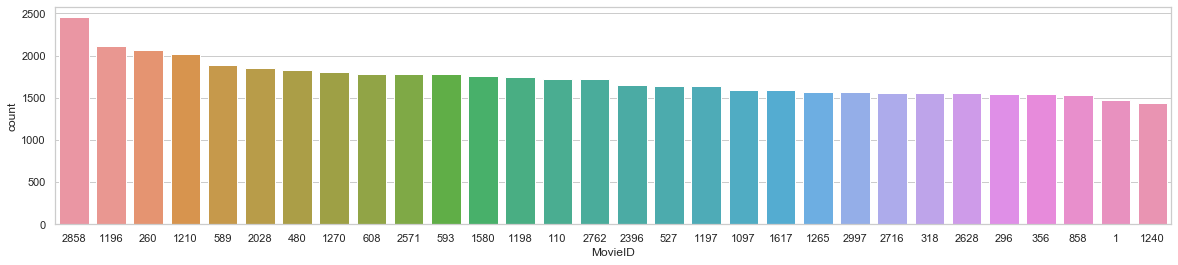

In [27]:
plt.figure(figsize=(20,4))
ax = sns.countplot(x="MovieID", data=dummytrain2, order=dummytrain2["MovieID"].value_counts().iloc[:30].index)
plt.show()

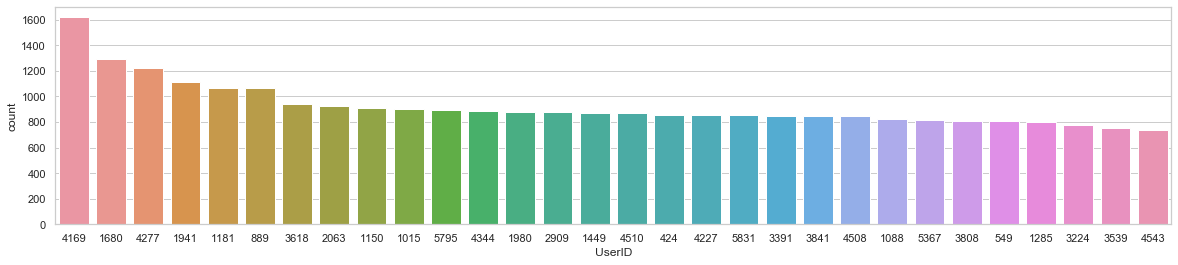

In [28]:
plt.figure(figsize=(20,4))
ax = sns.countplot(x="UserID", data=dummytrain2, order=dummytrain2["UserID"].value_counts().iloc[:30].index)
plt.show()

<h3>Check Missing Values</h3>

In [29]:
dummytrain2 = dummytrain2[~dummytrain2['MovieID'].isin(missing_movies)]
dummytrain2

,UserID,MovieID,Rating,year,month,day,hour
0,63,3006,4,2000,12,27,6
1,1125,10,2,2000,11,30,23
2,181,2384,2,2000,12,17,21
3,1968,1610,4,2000,11,20,17
4,4156,2410,4,2000,8,3,22
...,...,...,...,...,...,...,...
700141,4346,3301,1,2000,8,7,21
700142,1645,2359,5,2001,4,26,8
700143,2719,2871,2,2000,11,3,21
700144,4666,2335,3,2000,7,17,15


In [30]:
test = test[~test['MovieID'].isin(missing_movies)]
test

,UserID,MovieID,Timestamp
0,324,2803,976406738
1,4447,1920,965146127
2,4238,3676,965417632
3,4661,368,963867813
4,5078,3471,962416423
...,...,...,...
300058,3836,3138,965926550
300059,3632,3203,966536219
300060,3242,1627,968347685
300061,4362,2542,965188223


<h3>Check Duplicates in Train, Test, Movie and User</h3>

In [31]:
duplicate_train = train[train.duplicated(subset=['UserID','MovieID'], keep=False)]
duplicate_train

,UserID,MovieID,Rating,Timestamp


In [32]:
duplicate_test = test[test.duplicated(subset=['UserID','MovieID'], keep=False)]
duplicate_test

,UserID,MovieID,Timestamp


In [33]:
duplicate_users = users[users.duplicated(subset=['Gender','Age', 'Occupation', 'Zip-code'], keep=False)]
duplicate_users.sort_values(by=['Gender','Age', 'Occupation', 'Zip-code'])

,UserID,Gender,Age,Occupation,Zip-code
4548,4549,F,1,10,99016
5458,5459,F,1,10,99016
5410,5411,F,1,19,14850
5419,5420,F,1,19,14850
312,313,F,18,4,02138
...,...,...,...,...,...
1121,1122,M,56,14,02632
2125,2126,M,56,14,02632
2131,2132,M,56,14,02632
2807,2808,M,56,16,60610


In [34]:
pd.set_option('display.max_rows', 80)
duplicate_movies = movies_title[movies_title.duplicated(subset=['Title', 'Genre'], keep=False)] #If using movies_genre becomes 80
duplicate_movies.sort_values(by=['Title'])

,MovieID,Title,Genre,Year
2443,2512,"Ballad of Narayama, The (Narayama Bushiko)",Drama,1982
843,854,"Ballad of Narayama, The (Narayama Bushiko)",Drama,1958
2576,2645,Dracula,Horror,1958
2575,2644,Dracula,Horror,1931
3056,3125,"End of the Affair, The",Drama,1999
3057,3126,"End of the Affair, The",Drama,1955
2385,2454,"Fly, The",Horror|Sci-Fi,1958
2386,2455,"Fly, The",Horror|Sci-Fi,1986
2295,2364,Godzilla (Gojira),Action|Sci-Fi,1984
2294,2363,Godzilla (Gojira),Action|Sci-Fi,1954


<h2>Preprocessing</h2>

In this section, we now alter the data and/or its structure.

<h3>Merging Training and Testing with User and Movie</h3>

In [35]:
# Change with dummy if needed
training_user = pd.merge(train, users, on=['UserID'], how='inner')
training_user_movie = pd.merge(training_user, movies, on=['MovieID'], how='inner')
training_user_movie['Timestamp'] = pd.to_datetime(training_user_movie['Timestamp'], unit='s')
# training_user_movie['year'] = pd.DatetimeIndex(training_user_movie['Timestamp']).year
# training_user_movie['month'] = pd.DatetimeIndex(training_user_movie['Timestamp']).month
# training_user_movie['day'] = pd.DatetimeIndex(training_user_movie['Timestamp']).day
# training_user_movie['hour'] = pd.DatetimeIndex(training_user_movie['Timestamp']).hour
# training_user_movie = training_user_movie.drop(columns = ['Timestamp'])
training_user_movie.head()

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genre
0,63,3006,4,2000-12-27 06:47:56,M,18,4,54902,"Insider, The (1999)",Drama
1,5283,3006,5,2000-06-15 18:58:50,M,18,2,63138,"Insider, The (1999)",Drama
2,5433,3006,3,2000-06-03 15:44:19,F,35,17,45014,"Insider, The (1999)",Drama
3,192,3006,3,2000-12-17 03:41:37,M,18,1,10977,"Insider, The (1999)",Drama
4,1532,3006,5,2000-11-21 16:34:33,M,18,14,43613,"Insider, The (1999)",Drama


In [36]:
# Change with dummy if needed
testing_user = pd.merge(test, users, on=['UserID'], how='inner')
testing_user_movie = pd.merge(testing_user, movies, on=['MovieID'], how='inner')
testing_user_movie['Timestamp'] = pd.to_datetime(testing_user_movie['Timestamp'], unit='s')
# testing_user_movie['year'] = pd.DatetimeIndex(testing_user_movie['Timestamp']).year
# testing_user_movie['month'] = pd.DatetimeIndex(testing_user_movie['Timestamp']).month
# testing_user_movie['day'] = pd.DatetimeIndex(testing_user_movie['Timestamp']).day
# testing_user_movie['hour'] = pd.DatetimeIndex(testing_user_movie['Timestamp']).hour
# testing_user_movie = testing_user_movie.drop(columns = ['Timestamp'])
testing_user_movie.head()

,UserID,MovieID,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genre
0,324,2803,2000-12-10 00:05:38,M,35,17,55106,"Pelican Brief, The (1993)",Thriller
1,935,2803,2000-11-25 20:02:57,M,35,14,60538,"Pelican Brief, The (1993)",Thriller
2,678,2803,2001-05-10 14:08:50,M,25,0,34952,"Pelican Brief, The (1993)",Thriller
3,2887,2803,2000-10-24 02:40:59,M,25,3,66205,"Pelican Brief, The (1993)",Thriller
4,3720,2803,2000-08-14 11:56:35,M,45,7,43065,"Pelican Brief, The (1993)",Thriller


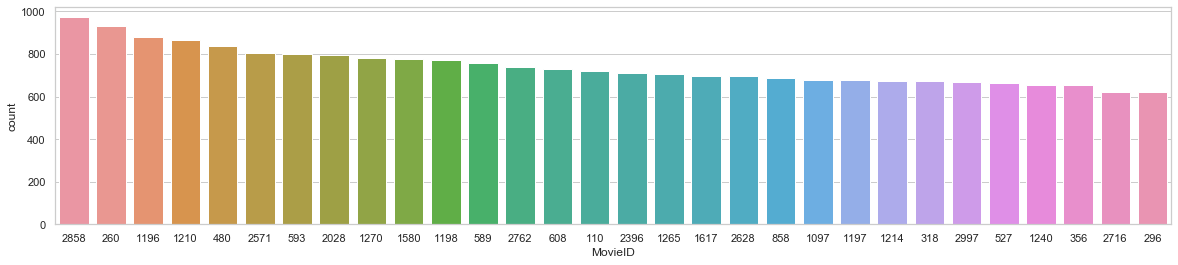

In [37]:
plt.figure(figsize=(20,4))
ax = sns.countplot(x="MovieID", data=testing_user_movie, order=testing_user_movie["MovieID"].value_counts().iloc[:30].index)
plt.show()

<h3>Handle Incomplete Data</h3>

In [38]:
#insert code to handle missing data here, be it drop or alter

<h3>Handle Inconsistent Data</h3>

In [39]:
#insert code to handle data that is most likely incorrect, from result of Data Exploration
# Check Training & Testing same user & movie with different/same timestamp

<h3>Handle Noise / Outliers</h3>

In [40]:
#insert extreme or disruptive data handling here, can use binning, or some other method.

<h3>[Insert appropriate preprocessing step here]</h3>

In [41]:
#insert one-hot encoding here, Feature Selection and Extraction, PCA, binning, etc

<h2>Model Training</h2>

It's time to select and train our algorithm(s) to make models that can predict the test dataset.

In [42]:
#insert all codes here, can use scikit-learn, can make own model

<h2>Evaluation and Analysis</h2>

From here onwards, we can only check how good our data is through cross-validation of our data with the training set. The test set is our final step and will be submitted to kaggle for scoring.

<h3>[Insert model choosing and training here]</h3>

In [43]:
#insert prediction and results here.

Make notes in Markdown as to why a certain model is chosen, if necessary.

<h3>Save Model</h3>

In [44]:
#saving model is important, so we don't have to train a new model when sharing .ipynb file to others.
#insert saving model method here.

<h3>Final Run</h3>

In [45]:
#predict test set, save results in .csv, with header of : ID,Predicted
#put code here

Extra notes:

<h1>EOF</h1>